In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('cleanSalary.csv')
data.head()

,Unnamed: 0,Country,EdLevel,YearsCodePro,Salary
0,2,16,2,5.0,40205.0
1,3,9,0,17.0,215232.0
2,8,8,2,6.0,49056.0
3,10,16,0,2.0,60307.0
4,11,17,0,10.0,194400.0


In [3]:
data = data.drop(columns='Unnamed: 0')
data.head()

,Country,EdLevel,YearsCodePro,Salary
0,16,2,5.0,40205.0
1,9,0,17.0,215232.0
2,8,2,6.0,49056.0
3,16,0,2.0,60307.0
4,17,0,10.0,194400.0


In [4]:
x = data.drop(columns='Salary')
y = data['Salary']

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=42)

## Random Forest Regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor

Rf=RandomForestRegressor(random_state=42) 
train_rf=Rf.fit(x_train,y_train)
pred_rf=Rf.predict(x_test)

In [7]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y_test,pred_rf))
print('${:,.02f}'.format(error))

$108,060.10


## Decision Tree Regressor

In [8]:
from sklearn.tree import DecisionTreeRegressor

Dt=DecisionTreeRegressor(random_state=42) 
train_dt=Dt.fit(x_train,y_train)
pred_dt=Dt.predict(x_test)

In [9]:
from sklearn.metrics import mean_squared_error

error1 = np.sqrt(mean_squared_error(y_test,pred_dt))
print('${:,.02f}'.format(error1))

$108,758.71


## Grid Search CV Random Forest Regressor

In [15]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth':max_depth}
model = RandomForestRegressor(random_state=0)
tuning = GridSearchCV(model,parameters,scoring='neg_mean_squared_error')
tuning.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [17]:
model = tuning.best_estimator_
model.fit(x_train,y_train)
f_pred = model.predict(x_test )
f_error = np.sqrt(mean_squared_error(y_test,f_pred))
print('${:,.02f}'.format(f_error))

$104,964.20


## Save Model

In [18]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model,f)

## Korelasi

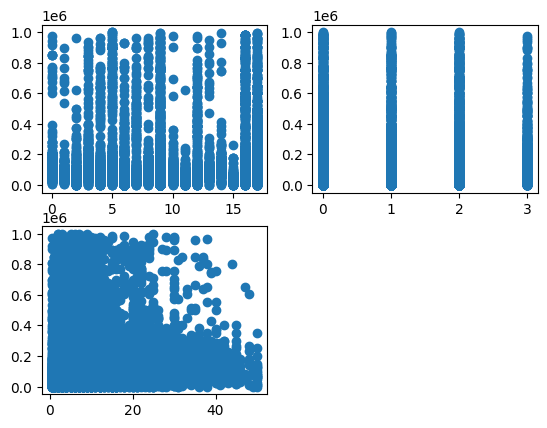

In [14]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.scatter(x['Country'],y)
plt.subplot(2,2,2)
plt.scatter(x['EdLevel'],y)
plt.subplot(2,2,3)
plt.scatter(x['YearsCodePro'],y)